<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2  (Problem 2) - Character Generator Model (Individual)</h2><h3>AY2022/23 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
from tensorflow import keras
import numpy as np
import tensorflow.keras
import os, shutil
import random
import sys
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import LSTM

C:\Users\limlo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Step 1 – Data Loading and Processing

### 1.1 Data Loading

In [2]:
base_dir = os.getcwd() #Set the base directory as the current directory

In [3]:
filename = 'C:\\Users\\limlo\\Downloads\\Deep Learning\\Assignment 2\\Harry_Potter_Book1.txt'
file = open(filename, encoding="utf8")  #read file as text
text = file.read()
file.close()
# split into words by white space
words = text.split()
# convert to lower case
words = [word.lower() for word in words]
extra_punct = [
    '-', '|', ';', '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
    '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',
    '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”',
    '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾',
    '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼', '⊕', '▼',
    '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲',
    'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»',
    '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø',
    '¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤']
numbers = ['1','2','3','4','5','6','7','8','9']
harrypotter = ""
for i in range(len(words)):
    word = words[i]
    if word[0] in extra_punct:
        continue
    elif word == 'j.k.' or word == '-j.k.':
        word = words[i + 1]
        if word == 'rowling':
            continue
    elif word == 'rowling':
        word = words[i - 1]
        if word == 'j.k.' or word == '-j.k.':
            continue
    elif word == 'page':
        word = words[i + 2]
        temp = words[i + 3]
        if word == 'harry' and temp == "potter":
            continue
    elif word[0] in numbers:
        word = words[i - 1]
        if word == 'page':
            continue
    elif word == 'harry':
        potter = words[i + 1]
        annd = words[i + 2]
        the = words[i + 3]
        philosophers = words[i + 4]
        stone = words[i + 5]
        if potter == 'potter' and annd == 'and' and the == 'the' and philosophers == 'philosophers' and stone == 'stone':
            continue
    elif word == 'potter':
        harry = words[i - 1]
        annd = words[i + 1]
        the = words[i + 2]
        philosophers = words[i + 3]
        stone = words[i + 4]
        if harry == 'harry' and annd == 'and' and the == 'the' and philosophers == 'philosophers' and stone == 'stone':
            continue
    elif word == 'and':
        harry = words[i - 2]
        potter = words[i - 1]
        the = words[i + 1]
        philosophers = words[i + 2]
        stone = words[i + 3]
        if harry == 'harry' and potter == 'potter' and the == 'the' and philosophers == 'philosophers' and stone == 'stone':
            continue
    elif word == 'the':
        harry = words[i - 3]
        potter = words[i - 2]
        annd = words[i - 1]
        philosophers = words[i + 1]
        stone = words[i + 2]
        if harry == 'harry' and potter == 'potter' and annd == 'and' and philosophers == 'philosophers' and stone == 'stone':
            continue
    elif word == 'philosophers':
        harry = words[i - 4]
        potter = words[i - 3]
        annd = words[i - 2]
        the = words[i - 1]
        stone = words[i + 1]
        if harry == 'harry' and potter == 'potter' and annd == 'and' and the == 'the' and stone == 'stone':
            continue
    elif word == 'stone':
        harry = words[i - 5]
        potter = words[i - 4]
        annd = words[i - 3]
        the = words[i - 2]
        philosophers = words[i - 1]
        if harry == 'harry' and potter == 'potter' and annd == 'and' and the == 'the' and philosophers == 'philosophers':
            continue
    else:
        harrypotter += word + " "


    
print(harrypotter)

mr. mrs. dursley, of number four, privet drive, were proud to say that they were perfectly normal, thank you very much. they were last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense. mr. dursley was director of a firm called grunnings, which made drills. he was a big, beefy man with hardly any neck, although he did have a very large mustache. mrs. dursley was thin blonde had nearly twice usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on neighbors. dursley s had a small son called dudley in their opinion there was no finer boy anywhere. dursleys had everything they wanted, but they also had a secret, their greatest fear was that somebody would discover it. they didn’t think they could bear it if anyone found out about potters. mrs. was mrs. dursley’s sister, but they hadn’t met for several years; in fact, mrs. dursley pretended she didn’t have a si

In [4]:
print('Corpus length:', len(harrypotter))
print(type(harrypotter))


Corpus length: 391040
<class 'str'>


### 1.2 Data Processing


In [5]:
# Length of extracted character sequences
maxlen = 60

# We sample a new sequence every `step` characters
step = 2

# This holds our extracted sequences
sentences = []

# This holds the targets (the follow-up characters)
next_chars = []

In [6]:
for i in range(0, len(harrypotter) - maxlen, step):
    sentences.append(harrypotter[i: i + maxlen])
    next_chars.append(harrypotter[i + maxlen])
print('Number of sequences:', len(sentences))
print('sentences[0]: ',sentences[0])
print('next_chars[0]: ',next_chars[0])
print('\n')
print('sentences[1]: ',sentences[1])
print('next_chars[1]: ',next_chars[1])

# List of unique characters in the corpus
chars = sorted(list(set(harrypotter)))
print('Unique characters:', len(chars))
print(chars)
# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

Number of sequences: 195490
sentences[0]:  mr. mrs. dursley, of number four, privet drive, were proud t
next_chars[0]:  o


sentences[1]:  . mrs. dursley, of number four, privet drive, were proud to 
next_chars[1]:  s
Unique characters: 44
[' ', '!', '"', '(', ')', ',', '-', '.', '/', '0', ':', ';', '?', '\\', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '—', '’', '“', '”']


In [7]:
# Next, one-hot encode the characters into binary arrays.
print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool_)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1
print('len(x): ',len(x))
print('x[0]: ',x[0])
print('len(y): ',len(y))
print('y[0]: ',y[0])
    

Vectorization...
len(x):  195490
x[0]:  [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [ True False False ... False False False]
 [False False False ... False False False]]
len(y):  195490
y[0]:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False]


In [8]:
x.shape

(195490, 60, 44)

## Step 2 – Develop Character Generator Model

In [13]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

In [44]:
model = keras.models.Sequential()
model.add(layers.GRU(512, input_shape=(maxlen, len(chars)), return_sequences=True))
model.add(layers.GRU(512, return_sequences=True))
model.add(layers.GRU(32))
model.add(layers.Dense(len(chars), activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_27 (GRU)                (None, 60, 512)           857088    
                                                                 
 gru_28 (GRU)                (None, 60, 512)           1575936   
                                                                 
 gru_29 (GRU)                (None, 32)                52416     
                                                                 
 dense_9 (Dense)             (None, 44)                1452      
                                                                 
Total params: 2,486,892
Trainable params: 2,486,892
Non-trainable params: 0
_________________________________________________________________


In [86]:
optimizer = optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x, y, batch_size=128, epochs=50, validation_split=0.2)

Epoch 1/50
815/815 [==============================] - 27s 29ms/step - loss: 3.0296 - accuracy: 0.1748 - val_loss: 3.0342 - val_accuracy: 0.1797
Epoch 2/50
815/815 [==============================] - 23s 28ms/step - loss: 2.9869 - accuracy: 0.1779 - val_loss: 2.7482 - val_accuracy: 0.2156
Epoch 3/50
815/815 [==============================] - 23s 28ms/step - loss: 2.5186 - accuracy: 0.2583 - val_loss: 2.3985 - val_accuracy: 0.2794
Epoch 4/50
815/815 [==============================] - 22s 27ms/step - loss: 2.3634 - accuracy: 0.2967 - val_loss: 2.3114 - val_accuracy: 0.3088
Epoch 5/50
815/815 [==============================] - 22s 27ms/step - loss: 2.2785 - accuracy: 0.3219 - val_loss: 2.2402 - val_accuracy: 0.3262
Epoch 6/50
815/815 [==============================] - 22s 27ms/step - loss: 2.2474 - accuracy: 0.3291 - val_loss: 2.2220 - val_accuracy: 0.3377
Epoch 7/50
815/815 [==============================] - 22s 27ms/step - loss: 2.2326 - accuracy: 0.3317 - val_loss: 2.2347 - val_accuracy:

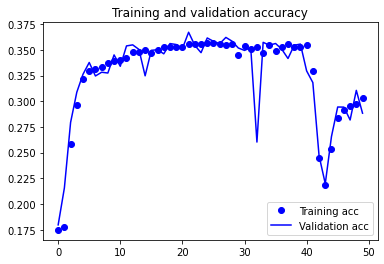

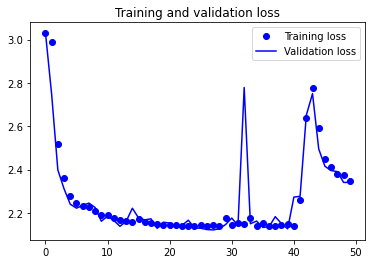

In [90]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Comments

The highest validation accuracy the model achieved is 36%. The validation loss of the model started to get noisier around the 30th epoch. Looking at the validation loss of the model, it seems that the model is starts to overfit at around the 40th epoch where the overall loss of the model starts to increase. 

In [88]:
model.save('harrypotter_text_model_1.h5')

In [89]:
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = harrypotter[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.3, 0.5, 0.7, 0.9, 1.0]:
        generated_text = generated_text_initial
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

--- Generating with seed: "ing about a game with only one ball where no one was allowed"
------ temperature: 0.2
ing about a game with only one ball where no one was allowed tude sor tare tare turl was ture an ther that tare tude tor tare tare that an was was her hagl ture thas ture tare sure tarl an sare te sare har tor tar tor has her her tore tor tur her he was he has his her toud her has was has ham her her has ture thas a her dhas her was sar sor that a tor bade tare tare ture ther his her has her her her thas her hat tare tare sran than tor an tar her sor her h
------ temperature: 0.3
ing about a game with only one ball where no one was allowed care said her has soud tare sar here bas tude tare sulr ture an an shas an turh has was had her sur her her turt gor sare tore had thas that sar her ror tare was tare tar tarl an than his was has her was her had sure sare tall has has has her an tare an sat suid this wam tor wim was her tart than an thas shan toun turh a her i has net tas 

# Comments

The text generation from the first model was atrocious. The words that are generated are not English words at all. 

In [45]:
model = keras.models.Sequential()
model.add(layers.GRU(512, input_shape=(maxlen, len(chars)), return_sequences=True))
model.add(layers.GRU(512, return_sequences=True))
model.add(layers.GRU(32))
model.add(layers.Dense(len(chars), activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_30 (GRU)                (None, 60, 512)           857088    
                                                                 
 gru_31 (GRU)                (None, 60, 512)           1575936   
                                                                 
 gru_32 (GRU)                (None, 32)                52416     
                                                                 
 dense_10 (Dense)            (None, 44)                1452      
                                                                 
Total params: 2,486,892
Trainable params: 2,486,892
Non-trainable params: 0
_________________________________________________________________


In [92]:
optimizer = optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x, y, batch_size=150, epochs=50, validation_split=0.2)

Epoch 1/50
696/696 [==============================] - 26s 33ms/step - loss: 2.5264 - accuracy: 0.2819 - val_loss: 2.2266 - val_accuracy: 0.3506
Epoch 2/50
696/696 [==============================] - 23s 34ms/step - loss: 2.0762 - accuracy: 0.3925 - val_loss: 2.0147 - val_accuracy: 0.4014
Epoch 3/50
696/696 [==============================] - 25s 36ms/step - loss: 1.8953 - accuracy: 0.4391 - val_loss: 1.8865 - val_accuracy: 0.4367
Epoch 4/50
696/696 [==============================] - 20s 29ms/step - loss: 1.7725 - accuracy: 0.4715 - val_loss: 1.7488 - val_accuracy: 0.4761
Epoch 5/50
696/696 [==============================] - 23s 33ms/step - loss: 1.6786 - accuracy: 0.4967 - val_loss: 1.6910 - val_accuracy: 0.4886
Epoch 6/50
696/696 [==============================] - 21s 31ms/step - loss: 1.6033 - accuracy: 0.5170 - val_loss: 1.6360 - val_accuracy: 0.5062
Epoch 7/50
696/696 [==============================] - 24s 35ms/step - loss: 1.5406 - accuracy: 0.5338 - val_loss: 1.6219 - val_accuracy:

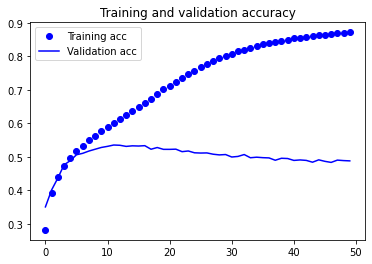

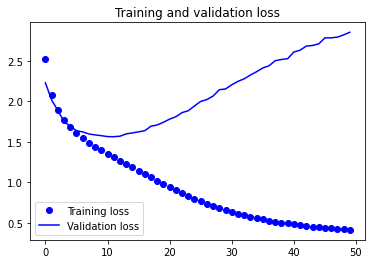

In [93]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Comments

The highest validation accuracy of the model is 53%. The model overfitted early at around the 10th epoch. The model performed bettwe after making changes to its learning rate and batch size. 

In [94]:
model.save('harrypotter_text_model_2.h5')

In [95]:
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = harrypotter[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.3, 0.5, 0.7, 0.9, 1.0]:
        generated_text = generated_text_initial
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

--- Generating with seed: " planets have been read wrongly before now, even by centaurs"
------ temperature: 0.2
 planets have been read wrongly before now, even by centaurs trobled of stonk. was he looked around at dark that spet flast baring. it’s fredt at sincate school, free but he have to locked at their kneh but madam portering as fon would perry. gray to builice, bette points screams by time me a hag. in slop. on tone back to be see, but could be predey, hagrid was again to come all thousand dursley stormims midnith castle for their head, that would make profe
------ temperature: 0.3
 planets have been read wrongly before now, even by centaurs trobless on their wands were weasley course bliven have noticed for this. ends from me, because percuse, would snape can found potions farts gasfidy back from here, ago not to perry. dumbledore, there was a boing down on top of right broom back of malfoy,” snape seemed to know he like got a pulleverommon told marint, even you mean. it’s sh

# Comments

Most of the words generated from the model are actual English words. Although if you read the entire text generated, you would find that the sentence does not make any sense at all. 

In [46]:
model = keras.models.Sequential()
model.add(layers.GRU(512, input_shape=(maxlen, len(chars)), return_sequences=True))
model.add(layers.GRU(512, return_sequences=True))
model.add(layers.GRU(32))
model.add(layers.Dense(len(chars), activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_33 (GRU)                (None, 60, 512)           857088    
                                                                 
 gru_34 (GRU)                (None, 60, 512)           1575936   
                                                                 
 gru_35 (GRU)                (None, 32)                52416     
                                                                 
 dense_11 (Dense)            (None, 44)                1452      
                                                                 
Total params: 2,486,892
Trainable params: 2,486,892
Non-trainable params: 0
_________________________________________________________________


In [97]:
optimizer = optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x, y, batch_size=175, epochs=50, validation_split=0.2)

Epoch 1/50
596/596 [==============================] - 20s 28ms/step - loss: 2.5155 - accuracy: 0.2853 - val_loss: 2.2085 - val_accuracy: 0.3621
Epoch 2/50
596/596 [==============================] - 16s 27ms/step - loss: 2.0988 - accuracy: 0.3876 - val_loss: 1.9844 - val_accuracy: 0.4123
Epoch 3/50
596/596 [==============================] - 16s 28ms/step - loss: 1.9046 - accuracy: 0.4395 - val_loss: 1.8371 - val_accuracy: 0.4563
Epoch 4/50
596/596 [==============================] - 16s 26ms/step - loss: 1.7683 - accuracy: 0.4734 - val_loss: 1.7366 - val_accuracy: 0.4838
Epoch 5/50
596/596 [==============================] - 16s 26ms/step - loss: 1.6702 - accuracy: 0.5007 - val_loss: 1.6705 - val_accuracy: 0.4994
Epoch 6/50
596/596 [==============================] - 16s 27ms/step - loss: 1.5938 - accuracy: 0.5195 - val_loss: 1.6323 - val_accuracy: 0.5073
Epoch 7/50
596/596 [==============================] - 16s 27ms/step - loss: 1.5306 - accuracy: 0.5348 - val_loss: 1.5974 - val_accuracy:

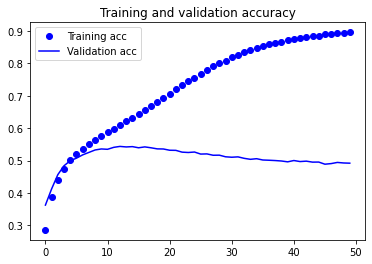

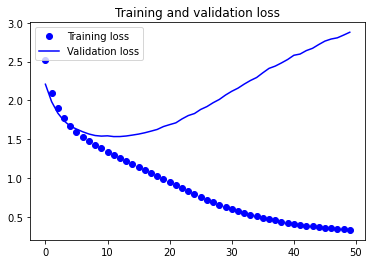

In [98]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Comments

The highest accuracy for the third model is 54%, an increase from the previous model. The model overfits at around the 8th epoch. 

In [99]:
model.save('harrypotter_text_model_3.h5')

In [100]:
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = harrypotter[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.3, 0.5, 0.7, 0.9, 1.0]:
        generated_text = generated_text_initial
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

--- Generating with seed: "go) what was that funny crunching noise? was rock crumbling "
------ temperature: 0.2
go) what was that funny crunching noise? was rock crumbling later, harry. could have been counce erch in a teams were reminded he signs, dudlens wouldn’t come so much. a nacr ext seen, too. he had been a torcles. was a lot bull, for a second. up, it was having for to play,” said gell’s right, dursleys have netsked it. he didn’t black looked at all. it was on could see them main have into anything about a kten a turned out a lumpy twinding anyone to stop al
------ temperature: 0.3
go) what was that funny crunching noise? was rock crumbling later, harry. could you’ve next upper shop. he could tell he mosn tink strangert?” he has posterbucll, he could betome, they pointed at they wouldn’t black that they were stranke at five out him. he looked all about that was still pink up silst class. his heart of a tume,” he was because a lot but a very meat laugh, you hand a stather, but 

# Comments

Ignoring the grammatical issues in the texts generated, the words generated seems acceptable. However, as the temperature increases, spelling errors become more prevalent. 

In [10]:
model = keras.models.Sequential()
model.add(layers.LSTM(512, input_shape=(maxlen, len(chars)), return_sequences=True))
model.add(layers.LSTM(512, return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dense(len(chars), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 512)           1140736   
                                                                 
 lstm_1 (LSTM)               (None, 60, 512)           2099200   
                                                                 
 lstm_2 (LSTM)               (None, 32)                69760     
                                                                 
 dense (Dense)               (None, 44)                1452      
                                                                 
Total params: 3,311,148
Trainable params: 3,311,148
Non-trainable params: 0
_________________________________________________________________


In [11]:
optimizer = optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x, y, batch_size=175, epochs=100, validation_split=0.2)

Epoch 1/100
596/596 [==============================] - 51s 80ms/step - loss: 3.0168 - accuracy: 0.1770 - val_loss: 2.9993 - val_accuracy: 0.1797
Epoch 2/100
596/596 [==============================] - 47s 78ms/step - loss: 2.9789 - accuracy: 0.1781 - val_loss: 2.8614 - val_accuracy: 0.1914
Epoch 3/100
596/596 [==============================] - 48s 81ms/step - loss: 2.5400 - accuracy: 0.2706 - val_loss: 2.3515 - val_accuracy: 0.3128
Epoch 4/100
596/596 [==============================] - 47s 79ms/step - loss: 2.2268 - accuracy: 0.3495 - val_loss: 2.1070 - val_accuracy: 0.3852
Epoch 5/100
596/596 [==============================] - 47s 79ms/step - loss: 2.0015 - accuracy: 0.4131 - val_loss: 1.9180 - val_accuracy: 0.4345
Epoch 6/100
596/596 [==============================] - 47s 79ms/step - loss: 1.8318 - accuracy: 0.4597 - val_loss: 1.7985 - val_accuracy: 0.4665
Epoch 7/100
596/596 [==============================] - 47s 79ms/step - loss: 1.7015 - accuracy: 0.4947 - val_loss: 1.7061 - val_ac

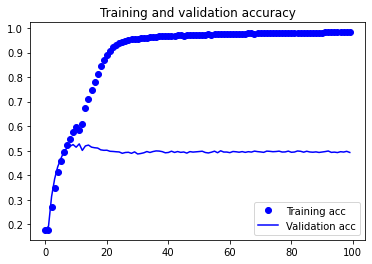

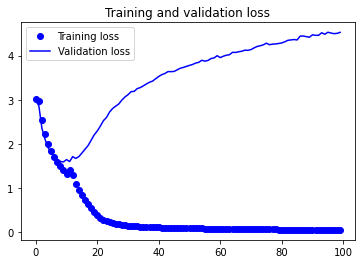

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Comments

The highest accuracy the model attained was 52%, performing worse than the third model with GRU layers. The model overfitted at around the 10th epoch. 

In [13]:
model.save('harrypotter_text_model_4.h5')

In [17]:
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = harrypotter[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.3, 0.5, 0.7, 0.9, 1.0]:
        generated_text = generated_text_initial
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

--- Generating with seed: "ng it, maybe not, but he thought a faint whispering was comi"
------ temperature: 0.2
ng it, maybe not, but he thought a faint whispering was coming on to gryffindor, hagrid had gople like an up time with a maint. a fing gryffindor, hagrid had goble as though he was stiffing it madam pince of bearing down at hagrid’s head so but it was neardly to turn up for leat. you think that they almost flyour faming time it was neville. pe

C:\Users\limlo\AppData\Local\Temp\ipykernel_15268\291334795.py:3: RuntimeWarning: divide by zero encountered in log
  preds = np.log(preds) / temperature # take a log function and then divided by temperature


rhacs when he triest to ang hording everyther to go do ron to go morbort to them, but a few meal poines he said. sa
------ temperature: 0.3
ng it, maybe not, but he thought a faint whispering was coming on to gryffindor, hagrid had goble as though he was stiffy on doors lead books uncle vernon said any a good teams shind. you magan. it was into air, even get sightlider, they were all be one of doors leckes of straight bortaught into air. he can misted back ins dath, a sharp got a cage a gaal sinked before scars was pilen as angrily saake in his father. it was looked floor. he had letter morth 
------ temperature: 0.5
ng it, maybe not, but he thought a faint whispering was coming on to gryffindor, was nothin’ potter!” if so hugh a few secund as he clicked back arasted at mistakerifing finisk, hagrid give harry’s usturner spells with bechat hagrid, unble vernon loaked with one of dark wizard gone snrouted. on hermione was terrible. up in too much, they didn’t usual to think they’d be if 

# Comments

Although there is a higher validation accuracy for the third model with GRU layers, looking at the generated text, there are no noticeable changes. There are still a lot of spelling and grammatical errors. 

In [15]:
model = keras.models.Sequential()
model.add(layers.Bidirectional(layers.LSTM(512, return_sequences=True), input_shape=(maxlen, len(chars))))
model.add(layers.Bidirectional(layers.LSTM(512, return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(len(chars), activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 60, 1024)         2281472   
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 60, 1024)         6295552   
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 64)               270592    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 44)                2860      
                                                                 
Total params: 8,850,476
Trainable params: 8,850,476
Non-trainable params: 0
____________________________________________

In [25]:
optimizer = optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x, y, batch_size=175, epochs=100, validation_split=0.2)

Epoch 1/100
596/596 [==============================] - 82s 129ms/step - loss: 2.7206 - accuracy: 0.2336 - val_loss: 2.4257 - val_accuracy: 0.2905
Epoch 2/100
596/596 [==============================] - 77s 129ms/step - loss: 2.2923 - accuracy: 0.3262 - val_loss: 2.1725 - val_accuracy: 0.3602
Epoch 3/100
596/596 [==============================] - 77s 129ms/step - loss: 2.0677 - accuracy: 0.3915 - val_loss: 1.9629 - val_accuracy: 0.4233
Epoch 4/100
596/596 [==============================] - 77s 130ms/step - loss: 1.9022 - accuracy: 0.4366 - val_loss: 1.8390 - val_accuracy: 0.4538
Epoch 5/100
596/596 [==============================] - 78s 130ms/step - loss: 1.7692 - accuracy: 0.4719 - val_loss: 1.7442 - val_accuracy: 0.4733
Epoch 6/100
596/596 [==============================] - 78s 130ms/step - loss: 1.6581 - accuracy: 0.5031 - val_loss: 1.6745 - val_accuracy: 0.4938
Epoch 7/100
596/596 [==============================] - 78s 130ms/step - loss: 1.5652 - accuracy: 0.5289 - val_loss: 1.6119 -

Epoch 57/100
596/596 [==============================] - 78s 131ms/step - loss: 0.0691 - accuracy: 0.9791 - val_loss: 3.8319 - val_accuracy: 0.5079
Epoch 58/100
596/596 [==============================] - 78s 131ms/step - loss: 0.0682 - accuracy: 0.9795 - val_loss: 3.8856 - val_accuracy: 0.5075
Epoch 59/100
596/596 [==============================] - 78s 131ms/step - loss: 0.0706 - accuracy: 0.9784 - val_loss: 3.8559 - val_accuracy: 0.5086
Epoch 60/100
596/596 [==============================] - 78s 131ms/step - loss: 0.0682 - accuracy: 0.9787 - val_loss: 3.8874 - val_accuracy: 0.5101
Epoch 61/100
596/596 [==============================] - 78s 131ms/step - loss: 0.0642 - accuracy: 0.9803 - val_loss: 3.8895 - val_accuracy: 0.5099
Epoch 62/100
596/596 [==============================] - 78s 131ms/step - loss: 0.0661 - accuracy: 0.9802 - val_loss: 3.9270 - val_accuracy: 0.5137
Epoch 63/100
596/596 [==============================] - 78s 131ms/step - loss: 0.0651 - accuracy: 0.9800 - val_loss: 3

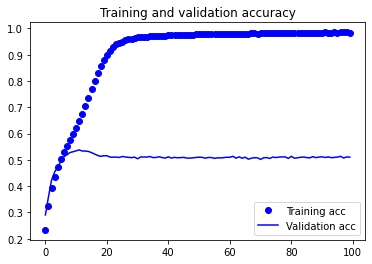

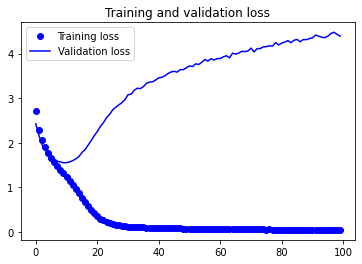

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Comments

The highest validation accuracy the model attained was 53% and the model overfitted at around the 10th epoch as well. It would be safe to assume that with the addition of Bidirectional, the model had a better accuracy, thus performing better.

In [27]:
model.save('harrypotter_text_model_5.h5')

In [28]:
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = harrypotter[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.3, 0.5, 0.7, 0.9, 1.0]:
        generated_text = generated_text_initial
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

--- Generating with seed: "is big one from mommy daddy.” right, thirty-seven then,” sai"
------ temperature: 0.2
is big one from mommy daddy.” right, thirty-seven then,” said dumbledore, whas in his wizard, which was worting. he was going to get him on a bag of his broom a gallow in neville. shake his father. he best helping by sill nicalate cloak at once, some coldardy mind by their peetes came out of chase, delight, down at them all thought i was a knownor holding about mail appeact inside on yours-all lead. he’d never been touched loud, that arrived in snape, don’
------ temperature: 0.3
is big one from mommy daddy.” right, thirty-seven then,” said dumbledore, what in carpled says it, something to do is it?” anywhere, but they caught them as a somemben.” he minned at malfoy. said gotten away, his parcing behink behind quive say his wight. show very bancently. there was a jom new to him, well a sistery stared over insteartaed it into a caustrions ever when i looked since an ilashe be

C:\Users\limlo\AppData\Local\Temp\ipykernel_15268\291334795.py:3: RuntimeWarning: divide by zero encountered in log
  preds = np.log(preds) / temperature # take a log function and then divided by temperature


k at harry! dowl she sounce climbing crowd, reptigleave given in a cloak good. have dotter. now,” said harry, lond-nowly e
------ temperature: 1.0
is big one from mommy daddy.” right, thirty-seven then,” said dumbledore, weas in as mistake, i will a touffger was moved into a heaps they’d got so when a small never been under lunking an’ jon be a were than ever supposed to get right, there’s fame, malfoy’s olanally, moment professor mcgonagall she had a very just know a kailed around his mindhans of hearts stering, points with his shoulders rather foo oppen up a train air. was a bat me nelcors, with re


# Comments

It seems that all the generated text with the different temperature all generated the same text after the seed, “said dumbledore,”. The difference in generation of text with different temperature can be seen after the text “said dumbledore,” as different variation of the word, “what”, is generated.

In [17]:
model = keras.models.Sequential()
model.add(layers.Bidirectional(layers.GRU(512, return_sequences=True), input_shape=(maxlen, len(chars))))
model.add(layers.Bidirectional(layers.GRU(512, return_sequences=True)))
model.add(layers.Bidirectional(layers.GRU(32)))
model.add(layers.Dense(len(chars), activation='softmax'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_5 (Bidirectio  (None, 60, 1024)         1714176   
 nal)                                                            
                                                                 
 bidirectional_6 (Bidirectio  (None, 60, 1024)         4724736   
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 64)               203136    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 44)                2860      
                                                                 
Total params: 6,644,908
Trainable params: 6,644,908
Non-trainable params: 0
____________________________________________

In [82]:
optimizer = optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x, y, batch_size=175, epochs=100, validation_split=0.2)

Epoch 1/100
596/596 [==============================] - 70s 110ms/step - loss: 2.2769 - accuracy: 0.3406 - val_loss: 1.9579 - val_accuracy: 0.4223
Epoch 2/100
596/596 [==============================] - 66s 110ms/step - loss: 1.8221 - accuracy: 0.4551 - val_loss: 1.7310 - val_accuracy: 0.4753
Epoch 3/100
596/596 [==============================] - 64s 107ms/step - loss: 1.6332 - accuracy: 0.5039 - val_loss: 1.6153 - val_accuracy: 0.5073
Epoch 4/100
596/596 [==============================] - 64s 107ms/step - loss: 1.5086 - accuracy: 0.5382 - val_loss: 1.5538 - val_accuracy: 0.5216
Epoch 5/100
596/596 [==============================] - 64s 107ms/step - loss: 1.4160 - accuracy: 0.5623 - val_loss: 1.5214 - val_accuracy: 0.5322
Epoch 6/100
596/596 [==============================] - 64s 108ms/step - loss: 1.3356 - accuracy: 0.5848 - val_loss: 1.4974 - val_accuracy: 0.5396
Epoch 7/100
596/596 [==============================] - 64s 108ms/step - loss: 1.2634 - accuracy: 0.6059 - val_loss: 1.5060 -

Epoch 57/100
596/596 [==============================] - 65s 108ms/step - loss: 0.4046 - accuracy: 0.8637 - val_loss: 2.8672 - val_accuracy: 0.5072
Epoch 58/100
596/596 [==============================] - 65s 108ms/step - loss: 0.4168 - accuracy: 0.8604 - val_loss: 2.8758 - val_accuracy: 0.5003
Epoch 59/100
596/596 [==============================] - 64s 108ms/step - loss: 0.4218 - accuracy: 0.8580 - val_loss: 2.8650 - val_accuracy: 0.5028
Epoch 60/100
596/596 [==============================] - 65s 108ms/step - loss: 0.4317 - accuracy: 0.8548 - val_loss: 2.8620 - val_accuracy: 0.4994
Epoch 61/100
596/596 [==============================] - 65s 108ms/step - loss: 0.4548 - accuracy: 0.8468 - val_loss: 2.8355 - val_accuracy: 0.4988
Epoch 62/100
596/596 [==============================] - 64s 108ms/step - loss: 0.4865 - accuracy: 0.8365 - val_loss: 2.8528 - val_accuracy: 0.4975
Epoch 63/100
596/596 [==============================] - 65s 108ms/step - loss: 0.5108 - accuracy: 0.8285 - val_loss: 2

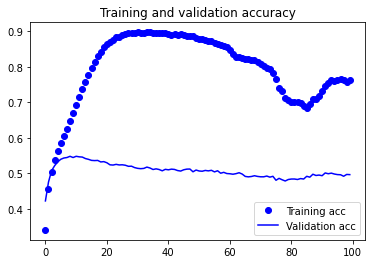

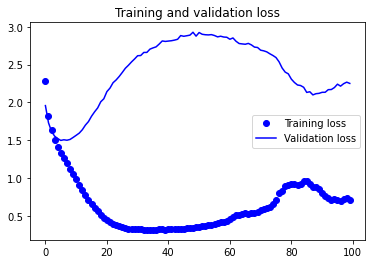

In [83]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Comments

The model overfitted at around the 10th epoch as the model’s overall validation loss starts is increasing. The model’s peak accuracy was 54%, suggesting that GRU layers performs better with my current dataset compared to LSTM layers. 

In [84]:
model.save('harrypotter_text_model_6.h5')

In [85]:
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = harrypotter[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.3, 0.5, 0.7, 0.9, 1.0]:
        generated_text = generated_text_initial
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

--- Generating with seed: "on. somethin’ about you finished him, harry. there was somet"
------ temperature: 0.2
on. somethin’ about you finished him, harry. there was something,” he said uncle vernon, snape kies, professor quirrell learned looked at him, i wouldn’t remember fore to find in a here. a can’t work. he said. argue. you’re ig’t they was at things this tiny more in thive it was hermione were off hear eghant when he reached top to be someone lay. he had left under he he’d be just get it belies of spells but had to kitch again. a looked as if if if if if you
------ temperature: 0.3
on. somethin’ about you finished him, harry. there was something,” he said uncle vernon. he finist too busines crowd. he said it if you, weasleying that had been year, we got to much teny was now ent of buirs time if he was almost twices from feeling down? all mement to might be somewhere they were in her face he’d be just reading looking at on to tround was slytherin’. it was feeling. there’s would

# Comments

There are not a lot of noticeable changes, but the most obvious error would be the text generated with a temperature of 0.2. Nearing the end of the generated code, it seems that the model kept repeating the word "if". More punctuations are also used in the text generated with a temperature of 0.9.

In [19]:
model = keras.models.Sequential()
model.add(layers.Bidirectional(layers.GRU(512, return_sequences=True), input_shape=(maxlen, len(chars))))
model.add(layers.Dropout(0.5))
model.add(layers.Bidirectional(layers.GRU(512, return_sequences=True)))
model.add(layers.Dropout(0.5))
model.add(layers.Bidirectional(layers.GRU(32)))
model.add(layers.Dense(len(chars), activation='softmax'))
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_8 (Bidirectio  (None, 60, 1024)         1714176   
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 60, 1024)          0         
                                                                 
 bidirectional_9 (Bidirectio  (None, 60, 1024)         4724736   
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 60, 1024)          0         
                                                                 
 bidirectional_10 (Bidirecti  (None, 64)               203136    
 onal)                                                           
                                                      

In [87]:
optimizer = optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x, y, batch_size=175, epochs=100, validation_split=0.2)

Epoch 1/100
596/596 [==============================] - 75s 117ms/step - loss: 2.3969 - accuracy: 0.3122 - val_loss: 2.0734 - val_accuracy: 0.3967
Epoch 2/100
596/596 [==============================] - 66s 110ms/step - loss: 2.0013 - accuracy: 0.4077 - val_loss: 1.8478 - val_accuracy: 0.4442
Epoch 3/100
596/596 [==============================] - 66s 111ms/step - loss: 1.8399 - accuracy: 0.4468 - val_loss: 1.7384 - val_accuracy: 0.4688
Epoch 4/100
596/596 [==============================] - 66s 111ms/step - loss: 1.7388 - accuracy: 0.4741 - val_loss: 1.6581 - val_accuracy: 0.4926
Epoch 5/100
596/596 [==============================] - 67s 112ms/step - loss: 1.6704 - accuracy: 0.4914 - val_loss: 1.6064 - val_accuracy: 0.5098
Epoch 6/100
596/596 [==============================] - 66s 111ms/step - loss: 1.6154 - accuracy: 0.5062 - val_loss: 1.5781 - val_accuracy: 0.5168
Epoch 7/100
596/596 [==============================] - 66s 111ms/step - loss: 1.5731 - accuracy: 0.5175 - val_loss: 1.5581 -

Epoch 57/100
596/596 [==============================] - 67s 112ms/step - loss: 1.4243 - accuracy: 0.5544 - val_loss: 1.6039 - val_accuracy: 0.5179
Epoch 58/100
596/596 [==============================] - 67s 112ms/step - loss: 1.4444 - accuracy: 0.5479 - val_loss: 1.5986 - val_accuracy: 0.5271
Epoch 59/100
596/596 [==============================] - 67s 112ms/step - loss: 1.4510 - accuracy: 0.5462 - val_loss: 1.6195 - val_accuracy: 0.5189
Epoch 60/100
596/596 [==============================] - 66s 112ms/step - loss: 1.4566 - accuracy: 0.5438 - val_loss: 1.6354 - val_accuracy: 0.5106
Epoch 61/100
596/596 [==============================] - 67s 112ms/step - loss: 1.5018 - accuracy: 0.5320 - val_loss: 1.6482 - val_accuracy: 0.5111
Epoch 62/100
596/596 [==============================] - 66s 112ms/step - loss: 1.4958 - accuracy: 0.5346 - val_loss: 1.6105 - val_accuracy: 0.5208
Epoch 63/100
596/596 [==============================] - 66s 111ms/step - loss: 1.4519 - accuracy: 0.5473 - val_loss: 1

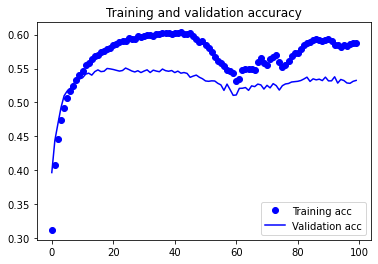

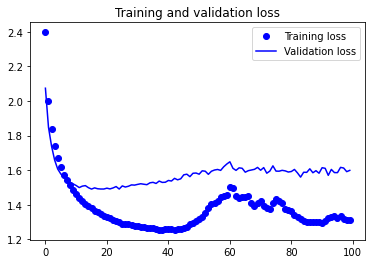

In [88]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Comments

The model attained a peak validation accuracy of 55%, performing the best amongst the previous model. The model overfitted later at around the 20th epoch. 
The validation loss increases gradually unlike the previous model where there is a sudden spike in loss. 

In [89]:
model.save('harrypotter_text_model_7.h5')

In [90]:
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = harrypotter[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.3, 0.5, 0.7, 0.9, 1.0]:
        generated_text = generated_text_initial
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

--- Generating with seed: "agreed they’d better not ask madam pince where they could fi"
------ temperature: 0.2
agreed they’d better not ask madam pince where they could find had found him off him so buzzed them off him over his face them before he was a bit of bezought of them boze of his face he was about them before you have a she’d be quite had squeaked floor, but he had been his face he strange, but he had squeaked him off him in his face he said hagrid had been them boze of his face as they were out of them to him off him over town for him off them to be over 
------ temperature: 0.3
agreed they’d better not ask madam pince where they could find out of his face as quick, but he was flavor a bit of his should you wizard had been before you whing him about him remember he had squeaked for lequidge off him off him by about you would have been you think you they had been you don’t be in his face them he’d be professor mcgonagall be studying them he had been from just been gryffindor

# Comments

Although there are still grammatical mistakes in the text generated there seems to be lesser misspelt words. It seems that the increase in accuracy resulted in more words that are spelt correctly. 

In [24]:
# Length of extracted character sequences
maxlen = 100

# We sample a new sequence every `step` characters
step = 5

# This holds our extracted sequences
sentences = []

# This holds the targets (the follow-up characters)
next_chars = []

In [25]:
for i in range(0, len(harrypotter) - maxlen, step):
    sentences.append(harrypotter[i: i + maxlen])
    next_chars.append(harrypotter[i + maxlen])
print('Number of sequences:', len(sentences))
print('sentences[0]: ',sentences[0])
print('next_chars[0]: ',next_chars[0])
print('\n')
print('sentences[1]: ',sentences[1])
print('next_chars[1]: ',next_chars[1])

# List of unique characters in the corpus
chars = sorted(list(set(harrypotter)))
print('Unique characters:', len(chars))
print(chars)
# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

Number of sequences: 78188
sentences[0]:  mr. mrs. dursley, of number four, privet drive, were proud to say that they were perfectly normal, t
next_chars[0]:  h


sentences[1]:  rs. dursley, of number four, privet drive, were proud to say that they were perfectly normal, thank 
next_chars[1]:  y
Unique characters: 44
[' ', '!', '"', '(', ')', ',', '-', '.', '/', '0', ':', ';', '?', '\\', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '—', '’', '“', '”']


In [26]:
# Next, one-hot encode the characters into binary arrays.
print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool_)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1
print('len(x): ',len(x))
print('x[0]: ',x[0])
print('len(y): ',len(y))
print('y[0]: ',y[0])
    

Vectorization...
len(x):  78188
x[0]:  [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [ True False False ... False False False]
 [False False False ... False False False]]
len(y):  78188
y[0]:  [False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False]


In [27]:
x.shape

(78188, 100, 44)

In [28]:
model = keras.models.Sequential()
model.add(layers.Bidirectional(layers.GRU(512, return_sequences=True), input_shape=(maxlen, len(chars))))
model.add(layers.Dropout(0.5))
model.add(layers.Bidirectional(layers.GRU(512, return_sequences=True)))
model.add(layers.Dropout(0.5))
model.add(layers.Bidirectional(layers.GRU(32)))
model.add(layers.Dense(len(chars), activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_32 (Bidirecti  (None, 60, 1024)         1714176   
 onal)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 60, 1024)          0         
                                                                 
 bidirectional_33 (Bidirecti  (None, 60, 1024)         4724736   
 onal)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 60, 1024)          0         
                                                                 
 bidirectional_34 (Bidirecti  (None, 64)               203136    
 onal)                                                           
                                                     

In [29]:
optimizer = optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x, y, batch_size=175, epochs=100, validation_split=0.2)

Epoch 1/100
358/358 [==============================] - 68s 177ms/step - loss: 2.7374 - accuracy: 0.2439 - val_loss: 2.3930 - val_accuracy: 0.3116
Epoch 2/100
358/358 [==============================] - 63s 176ms/step - loss: 2.4178 - accuracy: 0.3085 - val_loss: 2.2324 - val_accuracy: 0.3621
Epoch 3/100
358/358 [==============================] - 64s 178ms/step - loss: 2.2978 - accuracy: 0.3420 - val_loss: 2.1204 - val_accuracy: 0.3820
Epoch 4/100
358/358 [==============================] - 64s 179ms/step - loss: 2.2215 - accuracy: 0.3633 - val_loss: 2.0187 - val_accuracy: 0.4098
Epoch 5/100
358/358 [==============================] - 64s 179ms/step - loss: 2.1518 - accuracy: 0.3866 - val_loss: 1.9585 - val_accuracy: 0.4335
Epoch 6/100
358/358 [==============================] - 64s 179ms/step - loss: 2.0935 - accuracy: 0.4024 - val_loss: 1.9195 - val_accuracy: 0.4421
Epoch 7/100
358/358 [==============================] - 64s 180ms/step - loss: 2.0592 - accuracy: 0.4139 - val_loss: 1.8846 -

Epoch 57/100
358/358 [==============================] - 64s 180ms/step - loss: 1.0053 - accuracy: 0.6910 - val_loss: 2.1108 - val_accuracy: 0.5080
Epoch 58/100
358/358 [==============================] - 64s 180ms/step - loss: 0.9918 - accuracy: 0.6963 - val_loss: 2.1047 - val_accuracy: 0.5044
Epoch 59/100
358/358 [==============================] - 65s 180ms/step - loss: 0.9931 - accuracy: 0.6951 - val_loss: 2.1201 - val_accuracy: 0.5084
Epoch 60/100
358/358 [==============================] - 65s 180ms/step - loss: 0.9872 - accuracy: 0.6965 - val_loss: 2.1442 - val_accuracy: 0.5091
Epoch 61/100
358/358 [==============================] - 64s 180ms/step - loss: 0.9818 - accuracy: 0.6976 - val_loss: 2.1958 - val_accuracy: 0.5058
Epoch 62/100
358/358 [==============================] - 64s 180ms/step - loss: 0.9846 - accuracy: 0.6970 - val_loss: 2.1185 - val_accuracy: 0.5054
Epoch 63/100
358/358 [==============================] - 64s 180ms/step - loss: 0.9830 - accuracy: 0.6988 - val_loss: 2

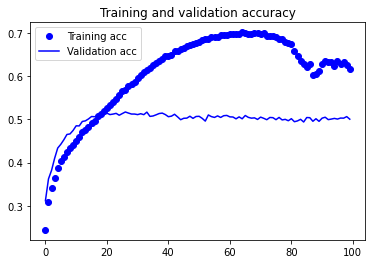

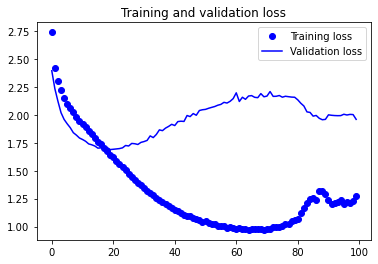

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Comments

The model attained the highest accuracy of 51%. The model overfits at around the same epoch as the seventh model, at the 20th epoch. However, it seems that this model performed worse compared to the previous models. 

In [32]:
model.save('harrypotter_text_model_8.h5')

In [33]:
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = harrypotter[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.3, 0.5, 0.7, 0.9, 1.0]:
        generated_text = generated_text_initial
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

--- Generating with seed: "u know! my youngest brother! got past mcgonagall’s giant chess set!” at last there was silence again"
------ temperature: 0.2
u know! my youngest brother! got past mcgonagall’s giant chess set!” at last there was silence again. he had been dudley was so was so harry’s stair harry. don’t got them to see idray without him. he had been was in a his arm. he had his from his wand, he had been lafe end off his hand had had gotten his should had his trush, then a baddden that hard a bad a hand a bath crock in seen at them. parked around a bit was they’d got to a back to stay, there as a parckers cream back, a good said. it it
------ temperature: 0.3
u know! my youngest brother! got past mcgonagall’s giant chess set!” at last there was silence again. he had got everyway he left him uncle vernon suddenly caught hind he had saws in a hand dragon professor mcgonagall a hander, for door had he caught them last to his he was a hand it had of his stopped a bit so his he ha

# Comments


The text generated with a temperature of 0.5 seems to be the best as it has the least spelling mistakes, around 5 errors found. Grammatical errors are still highly prevalent in the texts generated. 


In [9]:
# Length of extracted character sequences
maxlen = 60

# We sample a new sequence every `step` characters
step = 2

# This holds our extracted sequences
sentences = []

# This holds the targets (the follow-up characters)
next_chars = []

In [10]:
for i in range(0, len(harrypotter) - maxlen, step):
    sentences.append(harrypotter[i: i + maxlen])
    next_chars.append(harrypotter[i + maxlen])
print('Number of sequences:', len(sentences))
print('sentences[0]: ',sentences[0])
print('next_chars[0]: ',next_chars[0])
print('\n')
print('sentences[1]: ',sentences[1])
print('next_chars[1]: ',next_chars[1])

# List of unique characters in the corpus
chars = sorted(list(set(harrypotter)))
print('Unique characters:', len(chars))
print(chars)
# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

Number of sequences: 195490
sentences[0]:  mr. mrs. dursley, of number four, privet drive, were proud t
next_chars[0]:  o


sentences[1]:  . mrs. dursley, of number four, privet drive, were proud to 
next_chars[1]:  s
Unique characters: 44
[' ', '!', '"', '(', ')', ',', '-', '.', '/', '0', ':', ';', '?', '\\', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '—', '’', '“', '”']


In [11]:
# Next, one-hot encode the characters into binary arrays.
print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool_)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1
print('len(x): ',len(x))
print('x[0]: ',x[0])
print('len(y): ',len(y))
print('y[0]: ',y[0])
    

Vectorization...
len(x):  195490
x[0]:  [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [ True False False ... False False False]
 [False False False ... False False False]]
len(y):  195490
y[0]:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False]


In [12]:
x.shape

(195490, 60, 44)

In [21]:
model = keras.models.Sequential()
model.add(layers.Bidirectional(layers.GRU(512, return_sequences=True), input_shape=(maxlen, len(chars))))
model.add(layers.Dropout(0.5))
model.add(layers.Bidirectional(layers.GRU(512, return_sequences=True)))
model.add(layers.Dropout(0.5))
model.add(layers.Bidirectional(layers.GRU(32)))
model.add(layers.Dense(len(chars), activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_14 (Bidirecti  (None, 60, 1024)         1714176   
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 60, 1024)          0         
                                                                 
 bidirectional_15 (Bidirecti  (None, 60, 1024)         4724736   
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 60, 1024)          0         
                                                                 
 bidirectional_16 (Bidirecti  (None, 64)               203136    
 onal)                                                           
                                                      

In [20]:
optimizer = optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x, y, batch_size=200, epochs=100, validation_split=0.2)

Epoch 1/100
782/782 [==============================] - 101s 124ms/step - loss: 2.7212 - accuracy: 0.2404 - val_loss: 2.4235 - val_accuracy: 0.2971
Epoch 2/100
782/782 [==============================] - 97s 123ms/step - loss: 2.3206 - accuracy: 0.3183 - val_loss: 2.2065 - val_accuracy: 0.3597
Epoch 3/100
782/782 [==============================] - 97s 124ms/step - loss: 2.1598 - accuracy: 0.3652 - val_loss: 2.0707 - val_accuracy: 0.3945
Epoch 4/100
782/782 [==============================] - 98s 125ms/step - loss: 2.0512 - accuracy: 0.3963 - val_loss: 1.9639 - val_accuracy: 0.4215
Epoch 5/100
782/782 [==============================] - 98s 125ms/step - loss: 1.9648 - accuracy: 0.4177 - val_loss: 1.8954 - val_accuracy: 0.4351
Epoch 6/100
782/782 [==============================] - 98s 125ms/step - loss: 1.8963 - accuracy: 0.4354 - val_loss: 1.8258 - val_accuracy: 0.4562
Epoch 7/100
782/782 [==============================] - 98s 125ms/step - loss: 1.8384 - accuracy: 0.4506 - val_loss: 1.7807 

Epoch 57/100
782/782 [==============================] - 99s 126ms/step - loss: 1.1009 - accuracy: 0.6572 - val_loss: 1.5159 - val_accuracy: 0.5598
Epoch 58/100
782/782 [==============================] - 99s 126ms/step - loss: 1.0916 - accuracy: 0.6590 - val_loss: 1.5184 - val_accuracy: 0.5607
Epoch 59/100
782/782 [==============================] - 99s 126ms/step - loss: 1.0830 - accuracy: 0.6628 - val_loss: 1.5219 - val_accuracy: 0.5617
Epoch 60/100
782/782 [==============================] - 99s 126ms/step - loss: 1.0791 - accuracy: 0.6641 - val_loss: 1.5187 - val_accuracy: 0.5573
Epoch 61/100
782/782 [==============================] - 99s 126ms/step - loss: 1.0666 - accuracy: 0.6688 - val_loss: 1.5268 - val_accuracy: 0.5621
Epoch 62/100
782/782 [==============================] - 99s 126ms/step - loss: 1.0613 - accuracy: 0.6680 - val_loss: 1.5337 - val_accuracy: 0.5602
Epoch 63/100
782/782 [==============================] - 99s 126ms/step - loss: 1.0534 - accuracy: 0.6711 - val_loss: 1

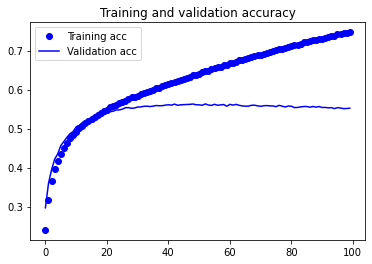

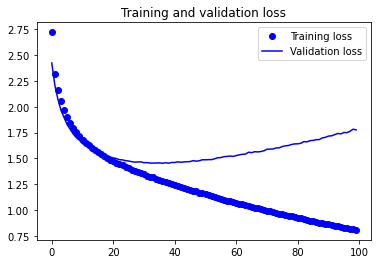

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Comments

The highest accuracy the model achieved was 56.2% and the model overfitted later at around the 30th epoch.

As the data is changed such that new sequences are sampled after a smaller number of steps, it helped the model to make more accurate predictions and thus, better accuracy. 

In [22]:
model.save('harrypotter_text_model_9.h5')

In [24]:
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = harrypotter[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.3, 0.5, 0.7, 0.9, 1.0]:
        generated_text = generated_text_initial
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

--- Generating with seed: "en when you was scared or angry?” looked into fire. now he c"
------ temperature: 0.2
en when you was scared or angry?” looked into fire. now he could see you at hogwarts, his head stretched him a letter of his wand on top of them. that’s why he’d been going to see that he’d been to his feet, they were staring to his feet that dudley were straight there they had noticed him a bit of them. they heard him a bit of them. they heard him a bit of them. three to his feet, then he said. his next to him out of his wand to fire him a bit of his wand
------ temperature: 0.3
en when you was scared or angry?” looked into fire. now he could go measurey. they say he had a small curiously dived donticked their first they crenkled with his broomstick was still haven’t had a somewhere down there. him on their ling them when he’d been to his feet, they were so hoping to their teething his head, but it had gone out. he was a somewhere down there. professor mcgonagall was smilin

# Comments

Checking the spelling of the words generated, it seems that there were hardly any spelling mistakes. As this model had the best validation accuracy, it seems that the text generated by the model was also the best. 

In [22]:
#maxlen = 60
#steps = 2

model = keras.models.Sequential()
model.add(layers.Bidirectional(layers.GRU(512, return_sequences=True), input_shape=(maxlen, len(chars))))
model.add(layers.Dropout(0.5))
model.add(layers.Bidirectional(layers.GRU(512, return_sequences=True)))
model.add(layers.Dropout(0.5))
model.add(layers.Bidirectional(layers.GRU(32)))
model.add(layers.Dense(len(chars), activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_17 (Bidirecti  (None, 60, 1024)         1714176   
 onal)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 60, 1024)          0         
                                                                 
 bidirectional_18 (Bidirecti  (None, 60, 1024)         4724736   
 onal)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 60, 1024)          0         
                                                                 
 bidirectional_19 (Bidirecti  (None, 64)               203136    
 onal)                                                           
                                                      

In [33]:
optimizer = optimizers.RMSprop(learning_rate=0.00065)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x, y, batch_size=200, epochs=100, validation_split=0.2)

Epoch 1/100
782/782 [==============================] - 106s 130ms/step - loss: 2.4022 - accuracy: 0.3060 - val_loss: 2.0875 - val_accuracy: 0.3851
Epoch 2/100
782/782 [==============================] - 100s 128ms/step - loss: 1.9982 - accuracy: 0.4073 - val_loss: 1.8569 - val_accuracy: 0.4486
Epoch 3/100
782/782 [==============================] - 98s 125ms/step - loss: 1.8340 - accuracy: 0.4498 - val_loss: 1.7315 - val_accuracy: 0.4778
Epoch 4/100
782/782 [==============================] - 98s 125ms/step - loss: 1.7304 - accuracy: 0.4767 - val_loss: 1.6560 - val_accuracy: 0.4947
Epoch 5/100
782/782 [==============================] - 98s 125ms/step - loss: 1.6580 - accuracy: 0.4957 - val_loss: 1.6020 - val_accuracy: 0.5096
Epoch 6/100
782/782 [==============================] - 98s 126ms/step - loss: 1.6028 - accuracy: 0.5105 - val_loss: 1.5625 - val_accuracy: 0.5212
Epoch 7/100
782/782 [==============================] - 98s 126ms/step - loss: 1.5589 - accuracy: 0.5218 - val_loss: 1.5329

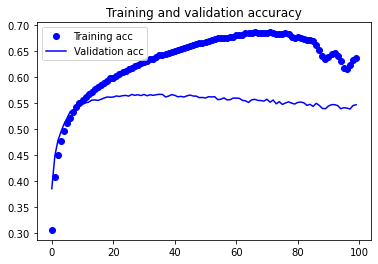

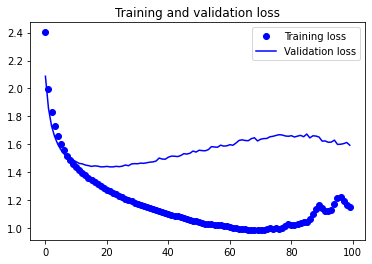

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Comments

The model overfitted at around the 30th epoch, with a highest accuracy of 56.6%.

In [35]:
model.save('harrypotter_text_model_10.h5')

In [46]:
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = harrypotter[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.3, 0.5, 0.7, 0.9, 1.0]:
        generated_text = generated_text_initial
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

--- Generating with seed: "ne by one, ghosts floated away through opposite wall. form a"
------ temperature: 0.2
ne by one, ghosts floated away through opposite wall. form a second clapped in a few carefull of fixice professor flitwick went of figuffs. he was a lot of a face from high above them off his father, which was scrambled into air off to gryffindor tower, which was he clicked in front of them what it was a bit of fat had been thinking he was still had been to him out of his face they were supposed to find of his father, which was scrambled over side of his f
------ temperature: 0.3
ne by one, ghosts floated away through opposite wall. form anyone.” they had didn’t have been with him cloak over to him off to be his father, she was still size could spent him off his head in his face, it’s best charliving room off flave he was going to look at five it was a very arms. potter, we was still that he was now their next to him, they had been his broom he’d strift that said hagrid him 

# Comments

I would be giving my comments on the generated text together with the next model as I am comparing the learning rate.

In [23]:
#maxlen = 60
#steps = 2

model = keras.models.Sequential()
model.add(layers.Bidirectional(layers.GRU(512, return_sequences=True), input_shape=(maxlen, len(chars))))
model.add(layers.Dropout(0.5))
model.add(layers.Bidirectional(layers.GRU(512, return_sequences=True)))
model.add(layers.Dropout(0.5))
model.add(layers.Bidirectional(layers.GRU(32)))
model.add(layers.Dense(len(chars), activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_20 (Bidirecti  (None, 60, 1024)         1714176   
 onal)                                                           
                                                                 
 dropout_9 (Dropout)         (None, 60, 1024)          0         
                                                                 
 bidirectional_21 (Bidirecti  (None, 60, 1024)         4724736   
 onal)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 60, 1024)          0         
                                                                 
 bidirectional_22 (Bidirecti  (None, 64)               203136    
 onal)                                                           
                                                      

In [38]:
optimizer = optimizers.RMSprop(learning_rate=0.00055)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x, y, batch_size=200, epochs=100, validation_split=0.2)

Epoch 1/100
782/782 [==============================] - 122s 145ms/step - loss: 2.4565 - accuracy: 0.2983 - val_loss: 2.1460 - val_accuracy: 0.3708
Epoch 2/100
782/782 [==============================] - 97s 124ms/step - loss: 2.0538 - accuracy: 0.3964 - val_loss: 1.9124 - val_accuracy: 0.4340
Epoch 3/100
782/782 [==============================] - 98s 125ms/step - loss: 1.8815 - accuracy: 0.4403 - val_loss: 1.7716 - val_accuracy: 0.4682
Epoch 4/100
782/782 [==============================] - 98s 126ms/step - loss: 1.7682 - accuracy: 0.4692 - val_loss: 1.6881 - val_accuracy: 0.4875
Epoch 5/100
782/782 [==============================] - 98s 126ms/step - loss: 1.6900 - accuracy: 0.4899 - val_loss: 1.6283 - val_accuracy: 0.5029
Epoch 6/100
782/782 [==============================] - 99s 126ms/step - loss: 1.6301 - accuracy: 0.5050 - val_loss: 1.5828 - val_accuracy: 0.5167
Epoch 7/100
782/782 [==============================] - 99s 126ms/step - loss: 1.5799 - accuracy: 0.5174 - val_loss: 1.5500 

Epoch 57/100
782/782 [==============================] - 99s 127ms/step - loss: 0.9476 - accuracy: 0.6972 - val_loss: 1.6192 - val_accuracy: 0.5580
Epoch 58/100
782/782 [==============================] - 99s 127ms/step - loss: 0.9424 - accuracy: 0.6998 - val_loss: 1.6429 - val_accuracy: 0.5553
Epoch 59/100
782/782 [==============================] - 99s 127ms/step - loss: 0.9357 - accuracy: 0.7019 - val_loss: 1.6473 - val_accuracy: 0.5600
Epoch 60/100
782/782 [==============================] - 99s 127ms/step - loss: 0.9352 - accuracy: 0.7007 - val_loss: 1.6419 - val_accuracy: 0.5564
Epoch 61/100
782/782 [==============================] - 99s 127ms/step - loss: 0.9283 - accuracy: 0.7032 - val_loss: 1.6479 - val_accuracy: 0.5594
Epoch 62/100
782/782 [==============================] - 99s 127ms/step - loss: 0.9229 - accuracy: 0.7047 - val_loss: 1.6648 - val_accuracy: 0.5574
Epoch 63/100
782/782 [==============================] - 99s 127ms/step - loss: 0.9201 - accuracy: 0.7054 - val_loss: 1

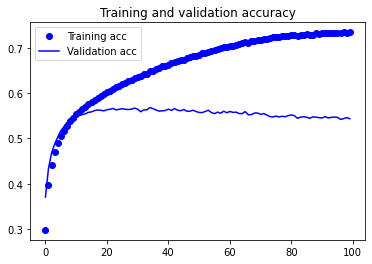

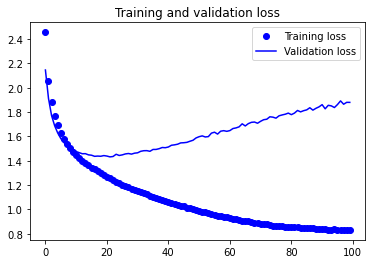

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Comments

The model overfitted at around the 20th epoch with a peak accuracy of 56.6%. This model with a learning rate of 0.00055 performed better than the previous model with a learning rate of 0.00065.

In [40]:
model.save('harrypotter_text_model_11.h5')

In [49]:
generated_text_initial = 'ne by one, ghosts floated away through opposite wall. form a'
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.3, 0.5, 0.7, 0.9, 1.0]:
        generated_text = generated_text_initial
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

--- Generating with seed: "ne by one, ghosts floated away through opposite wall. form a"
------ temperature: 0.2
ne by one, ghosts floated away through opposite wall. form a few moment a simply gave a bad a body faded for a frash cap, but i’ve got a large ballowed around him. up, you know, i want magic you know,” said harry. you my got muxlly for breakfast. you’ve got a lotq of everyone ever madam picked up a bit of a bit let me have been him smile. a few fick, but maybe he just been longing them to be seeing to find out a very close, harry. was changeling when somet
------ temperature: 0.3
ne by one, ghosts floated away through opposite wall. form a few moment a lay of an excuse to for make a bad lay stood apart floor. have you been broken-agard for a floor. make mixed up around him. moved of black, because of moldy complain about a very coddly. aunt petunia was a vampired pay didn’t bludged in his mold. a broomstick,” he had a bright blue every families a classroom in hall. you was a

# Comments

From what I can see, there are no differences in the text generated. As such, looking at the validation accuracy of the model, the eleventh model with a learning rate of 0.00055 was better. 

In [24]:
#maxlen = 60
#steps = 2

model = keras.models.Sequential()
model.add(layers.Bidirectional(layers.GRU(512, return_sequences=True, recurrent_regularizer=regularizers.l2(0.001)), input_shape=(maxlen, len(chars))))
model.add(layers.Dropout(0.5))
model.add(layers.Bidirectional(layers.GRU(512, return_sequences=True, recurrent_regularizer=regularizers.l2(0.0001))))
model.add(layers.Dropout(0.5))
model.add(layers.Bidirectional(layers.GRU(32)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(chars), activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_23 (Bidirecti  (None, 60, 1024)         1714176   
 onal)                                                           
                                                                 
 dropout_11 (Dropout)        (None, 60, 1024)          0         
                                                                 
 bidirectional_24 (Bidirecti  (None, 60, 1024)         4724736   
 onal)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 60, 1024)          0         
                                                                 
 bidirectional_25 (Bidirecti  (None, 64)               203136    
 onal)                                                           
                                                     

In [17]:
optimizer = optimizers.RMSprop(learning_rate=0.00055)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x, y, batch_size=200, epochs=100, validation_split=0.2)

Epoch 1/100
782/782 [==============================] - 109s 133ms/step - loss: 2.7523 - accuracy: 0.2506 - val_loss: 2.3837 - val_accuracy: 0.3194
Epoch 2/100
782/782 [==============================] - 105s 134ms/step - loss: 2.4254 - accuracy: 0.3102 - val_loss: 2.2333 - val_accuracy: 0.3613
Epoch 3/100
782/782 [==============================] - 108s 139ms/step - loss: 2.3252 - accuracy: 0.3405 - val_loss: 2.1232 - val_accuracy: 0.3945
Epoch 4/100
782/782 [==============================] - 104s 133ms/step - loss: 2.2602 - accuracy: 0.3624 - val_loss: 2.0554 - val_accuracy: 0.4147
Epoch 5/100
782/782 [==============================] - 105s 134ms/step - loss: 2.2093 - accuracy: 0.3795 - val_loss: 2.0057 - val_accuracy: 0.4325
Epoch 6/100
782/782 [==============================] - 106s 136ms/step - loss: 2.1623 - accuracy: 0.3970 - val_loss: 1.9617 - val_accuracy: 0.4414
Epoch 7/100
782/782 [==============================] - 105s 135ms/step - loss: 2.1220 - accuracy: 0.4099 - val_loss: 1

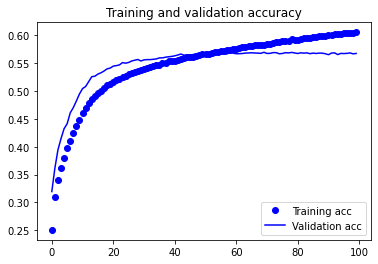

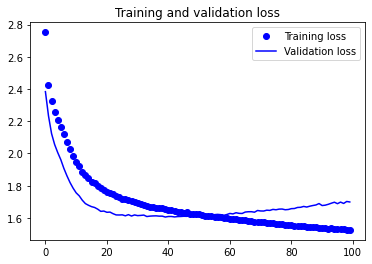

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Comments 

The model started to overfit at around the 50th epoch. The model attained a peak accuracy of 56.9%.

In [19]:
model.save('harrypotter_text_model_12.h5')

In [22]:
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = harrypotter[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.3, 0.5, 0.7, 0.9, 1.0]:
        generated_text = generated_text_initial
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

--- Generating with seed: "d with chessmen seamus finnigan had lent him, they didn’t tr"
------ temperature: 0.2
d with chessmen seamus finnigan had lent him, they didn’t try a start of them. he was a started to come to a stand of a lot of a lot of a lot of pastices as it was a bit of a large start of steaping with his broomstick he was a bad stood a thinging like a stanter that they were so that they were saying them one of them was a bit of a little back of his hand because he was all forgotten off there was a start of them had been to his hand to his father that h
------ temperature: 0.3
d with chessmen seamus finnigan had lent him, they didn’t try a start of them, she said said hagrid. he was a lot of families he was a ground, but he was a passing a that all that something so anything seemed to get him at him, studying a long back in his eyes, they had not to see a name in with said it was a letter to hagrid he was a realize that he was all back to his hand. he was a bit to have to

# Comments

Noticeable differences between the different temperatures is the word after “didn’t”. Only the text with temperature of 0.7 and 0.9 generated different words after the word “didn’t”. Other than that, it seems that the generated text has more spelling errors as compared to the ninth model. 

In [25]:
#maxlen = 60
#steps = 2

model = keras.models.Sequential()
model.add(layers.Bidirectional(layers.GRU(512, return_sequences=True, recurrent_regularizer=regularizers.l2(0.004)), input_shape=(maxlen, len(chars))))
model.add(layers.Dropout(0.5))
model.add(layers.Bidirectional(layers.GRU(512, return_sequences=True, recurrent_regularizer=regularizers.l2(0.0003))))
model.add(layers.Dropout(0.5))
model.add(layers.Bidirectional(layers.GRU(32)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(chars), activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_26 (Bidirecti  (None, 60, 1024)         1714176   
 onal)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 60, 1024)          0         
                                                                 
 bidirectional_27 (Bidirecti  (None, 60, 1024)         4724736   
 onal)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 60, 1024)          0         
                                                                 
 bidirectional_28 (Bidirecti  (None, 64)               203136    
 onal)                                                           
                                                     

In [31]:
optimizer = optimizers.RMSprop(learning_rate=0.00055)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x, y, batch_size=256, epochs=100, validation_split=0.2)

Epoch 1/100
611/611 [==============================] - 114s 175ms/step - loss: 2.8576 - accuracy: 0.2412 - val_loss: 2.4184 - val_accuracy: 0.3072
Epoch 2/100
611/611 [==============================] - 88s 144ms/step - loss: 2.4727 - accuracy: 0.2944 - val_loss: 2.2839 - val_accuracy: 0.3393
Epoch 3/100
611/611 [==============================] - 89s 145ms/step - loss: 2.3780 - accuracy: 0.3194 - val_loss: 2.1981 - val_accuracy: 0.3737
Epoch 4/100
611/611 [==============================] - 89s 146ms/step - loss: 2.3155 - accuracy: 0.3404 - val_loss: 2.1371 - val_accuracy: 0.3862
Epoch 5/100
611/611 [==============================] - 90s 147ms/step - loss: 2.2740 - accuracy: 0.3534 - val_loss: 2.0863 - val_accuracy: 0.4043
Epoch 6/100
611/611 [==============================] - 91s 148ms/step - loss: 2.2368 - accuracy: 0.3670 - val_loss: 2.0455 - val_accuracy: 0.4130
Epoch 7/100
611/611 [==============================] - 91s 149ms/step - loss: 2.2079 - accuracy: 0.3778 - val_loss: 2.0026 

Epoch 57/100
611/611 [==============================] - 90s 148ms/step - loss: 1.6720 - accuracy: 0.5427 - val_loss: 1.5924 - val_accuracy: 0.5562
Epoch 58/100
611/611 [==============================] - 90s 148ms/step - loss: 1.6703 - accuracy: 0.5431 - val_loss: 1.5947 - val_accuracy: 0.5574
Epoch 59/100
611/611 [==============================] - 90s 148ms/step - loss: 1.6689 - accuracy: 0.5443 - val_loss: 1.5912 - val_accuracy: 0.5576
Epoch 60/100
611/611 [==============================] - 93s 153ms/step - loss: 1.6623 - accuracy: 0.5460 - val_loss: 1.5903 - val_accuracy: 0.5609
Epoch 61/100
611/611 [==============================] - 97s 158ms/step - loss: 1.6606 - accuracy: 0.5461 - val_loss: 1.5905 - val_accuracy: 0.5584
Epoch 62/100
611/611 [==============================] - 95s 155ms/step - loss: 1.6595 - accuracy: 0.5463 - val_loss: 1.5920 - val_accuracy: 0.5584
Epoch 63/100
611/611 [==============================] - 90s 148ms/step - loss: 1.6580 - accuracy: 0.5467 - val_loss: 1

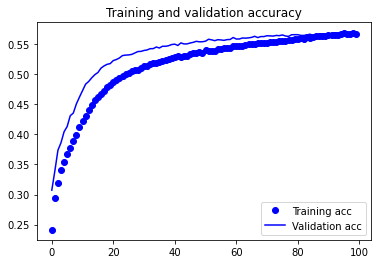

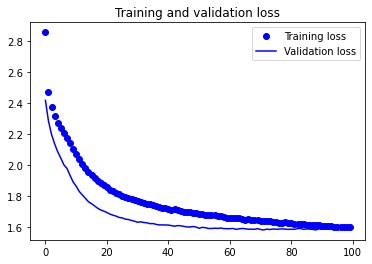

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Comments

The model is underfitted with a peak accuracy of 56.9%. However, it was not my intention to get the model to be so underfitted. Due to time constraint, for the next model, it would be based on the previous model.

In [33]:
model.save('harrypotter_text_model_13.h5')

In [34]:
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = harrypotter[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.3, 0.5, 0.7, 0.9, 1.0]:
        generated_text = generated_text_initial
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

--- Generating with seed: "n’t believe it ... i didn’t want to believe it ... oh, albus"
------ temperature: 0.2
n’t believe it ... i didn’t want to believe it ... oh, albus harry’s wand stared at him on top of his stared to see it a should be to see his hand to see of them to see his hand to start a sharp something he was staring at him on his face to get a start of them so word to see him a bit of his for them anything to see his hand to say he was staring at all in his hand to see it to see what they were saying to learn they started to get out of his hand to say 
------ temperature: 0.3
n’t believe it ... i didn’t want to believe it ... oh, albus he was to see them to see his head show of them was a start of them to see his hand to get a sudden from gray what they were saying to see his broomstick was there in his forete had been a little to see his head stood at them on top of his face in a large start. then he was staring at it. they started to be on to them a something a single 

# Comments

The number of spelling mistakes seems to be lesser than the generated text from the previous model. However, the grammatical errors are still present.  

In [26]:
#maxlen = 60
#steps = 2

model = keras.models.Sequential()
model.add(layers.Bidirectional(layers.GRU(512, return_sequences=True, recurrent_regularizer=regularizers.l2(0.001)), input_shape=(maxlen, len(chars))))
model.add(layers.Dropout(0.5))
model.add(layers.Bidirectional(layers.GRU(512, return_sequences=True, recurrent_regularizer=regularizers.l2(0.0001))))
model.add(layers.Dropout(0.5))
model.add(layers.Bidirectional(layers.GRU(32)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(chars), activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_29 (Bidirecti  (None, 60, 1024)         1714176   
 onal)                                                           
                                                                 
 dropout_17 (Dropout)        (None, 60, 1024)          0         
                                                                 
 bidirectional_30 (Bidirecti  (None, 60, 1024)         4724736   
 onal)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 60, 1024)          0         
                                                                 
 bidirectional_31 (Bidirecti  (None, 64)               203136    
 onal)                                                           
                                                     

In [47]:
optimizer = optimizers.RMSprop(learning_rate=0.00055)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x, y, batch_size=256, epochs=50, validation_split=0.2)

Epoch 1/50
611/611 [==============================] - 100s 155ms/step - loss: 2.7891 - accuracy: 0.2437 - val_loss: 2.3947 - val_accuracy: 0.3057
Epoch 2/50
611/611 [==============================] - 93s 151ms/step - loss: 2.4395 - accuracy: 0.3037 - val_loss: 2.2440 - val_accuracy: 0.3524
Epoch 3/50
611/611 [==============================] - 94s 153ms/step - loss: 2.3324 - accuracy: 0.3351 - val_loss: 2.1385 - val_accuracy: 0.3848
Epoch 4/50
611/611 [==============================] - 94s 155ms/step - loss: 2.2651 - accuracy: 0.3580 - val_loss: 2.0833 - val_accuracy: 0.4109
Epoch 5/50
611/611 [==============================] - 95s 155ms/step - loss: 2.2150 - accuracy: 0.3742 - val_loss: 2.0104 - val_accuracy: 0.4279
Epoch 6/50
611/611 [==============================] - 93s 152ms/step - loss: 2.1742 - accuracy: 0.3870 - val_loss: 1.9700 - val_accuracy: 0.4371
Epoch 7/50
611/611 [==============================] - 91s 149ms/step - loss: 2.1395 - accuracy: 0.4002 - val_loss: 1.9234 - val_a

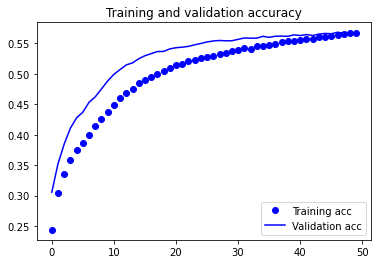

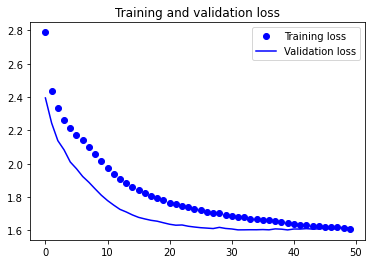

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Comments

This model is ran based on the twelfth model. The optimal range for the tweflth model is at the 50th epoch, as such I have trained this model till the 50th epoch. The final model has an accuracy of 56.7%. 

In [50]:
model.save('harrypotter_text_model_14.h5')

In [51]:
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = harrypotter[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.3, 0.5, 0.7, 0.9, 1.0]:
        generated_text = generated_text_initial
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

--- Generating with seed: "fessor mcgonagall coldly, as though she didn’t think this wa"
------ temperature: 0.2
fessor mcgonagall coldly, as though she didn’t think this was a lot of them to be say they had to get a long a bot in his head showing him a closer to harry. he was a little as he was a little better them to tell him a bit of his hand on them to have been as they were saying a bit of them to think a bit of them to think he had to think a shoulder that he was hard to see him off to them to think of them to think of them to tell you think they had to their t
------ temperature: 0.3
fessor mcgonagall coldly, as though she didn’t think this was a back of them was a stall on their way at harry. he was a lot of plasses of them was a little past of that magic for some of them had a surprise as he was a little so they were a little better them he started to see his hand on saying he was a lot as he couldn’t one of them was a bit to tell him a long his wand them they were at his find

# Comments

Ignoring the grammatical errors, it seems that texts generated by the model are decent. Although there are some spelling mistakes still present. The temperature that generates the most spelling errors is obviously 1.0.  

## Step 3 – Use the developed Model to generate the characters / sentences

In [15]:
# Load the model
model = keras.models.load_model('harrypotter_text_model_14.h5')

In [38]:
# takes the user input
text_input = input("").lower()

I went overseas to buy multiple items. I did my chores before going overseas


In [39]:
# Use the Best Model to generate 400 characters
generated_text_initial = text_input[:60]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.3, 0.5, 0.7, 0.9, 1.0]:
        generated_text = generated_text_initial
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

--- Generating with seed: "i went overseas to buy multiple items. i did my chores befor"
------ temperature: 0.2
i went overseas to buy multiple items. i did my chores before, he said at hermione granger was a long better them to think a something had never had a bit of them had a seemed to be saying he had a start at him a saying they had a lot as he was a bit of them to tell him a lot a letter to have they had to tell him to be saying they had a lot of them to do with a things was a started to them to make a lot of room to do something it was a letter to their hand
------ temperature: 0.3
i went overseas to buy multiple items. i did my chores before he was a realing then he said. they were looking to be carefully at his face was saying a lot of started to their both to them. they had a bit of them was they had to think he had been didn’t do it was a little with sropted in corridor that they were saying they had a long people had never heard a students on them down to them he was a st

# Comments

All the texts generated from the different temperature managed to complete the word “befor” to “before”. Since this model is a character generator, the completion of the word “befor” to “before” is a given. 